In [61]:
import tweepy
import webbrowser
import time
import pandas as pd
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud



In [2]:

# Twitter API credentials
consumerKey = ''
consumerSecret = ''

print(consumerKey)
print(consumerSecret)

consumer_key = consumerKey
consumer_secret = consumerSecret

callback_uri = 'oob'
# Create the authencation object 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret,callback_uri)

# redirect url
redirect_url = auth.get_authorization_url()
print(redirect_url)

webbrowser.open(redirect_url)
user_pin_input = input("What is the pin value?")
auth.get_access_token(user_pin_input)

IpeydyIgVw0jV5xDS4vLOFD0v
tsSUv6IQwgjeBLAQxDxro32VMvxDEHFFFhEg04c4eAxpk3POY7
https://api.twitter.com/oauth/authorize?oauth_token=j1_UWAAAAAABLHeXAAABdtCT9VQ
What is the pin value?5085722


('1250089505043779589-iFnR9t5HgPJPvjW7UEpOHyUd021zf1',
 'osDD2wl9D8tr1LF7eOMUlDaZo78YvQKfph8AD3L8QTyts')

In [3]:
api = tweepy.API(auth,wait)

In [55]:
# #- 1st option getting user timeline tweets
# # fetching the statuses 
# statuses = api.user_timeline("BillGates", count = 100) 
  
# # printing the statuses 
# for status in statuses: 
#     print(status.text, end = "\n\n") 
    



In [46]:
#fetching the status of username in Twitter
other_user = "BillGates"

tweet_status=[]
for i, status in enumerate(tweepy.Cursor(api.user_timeline,screen_name=other_user).items(100)):
    print(i, status.text)
    tweet_status.append(status.text)

0 It’s great to see India’s leadership in scientific innovation and vaccine manufacturing capability as the world wor… https://t.co/XR68nmXE3g
1 RT @lastmilehealth: The best emergency system is a strong primary health system—powered by community and frontline health workers. Now is t…
2 What does Rashida Jones have on her shopping list? That’s just one of the many questions that didn’t make it into o… https://t.co/12zZthysds
3 2021 will be better than 2020. Here’s why: https://t.co/mYbpl5wwF1
4 Standing up for science has never been more important. Congratulations to Dr. Anthony Fauci and Dr. Salim Abdool Ka… https://t.co/Hz9CNhMWJg
5 I've known and learned from @RonConway for more than 40 years. I'm glad to see @svangel team up with @bchesky to me… https://t.co/L501h9Nt6X
6 This book has nothing to do with viruses or pandemics. But it is surprisingly relevant for these times. @exlarson p… https://t.co/MvmKkI0KWV
7 Monoclonal antibodies are one of the most promising treatments we have 

60 To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to… https://t.co/eop0Xg5jjz
61 Dr. John Nkengasong is a true Goalkeeper. His leadership will help ensure Africa has the tools it needs to fight CO… https://t.co/uVlSrcO81A
62 Justice Ginsburg was a trailblazer who devoted her entire career to fighting for equal justice for women, because s… https://t.co/R8orT60oYR
63 My dad was the “real” Bill Gates. He was everything I try to be and I will miss him every day.

https://t.co/OnAEsmosNb
64 Thank you to the heroes everywhere working to keep us safe. I hope their stories inspire you just as much as they h… https://t.co/9s9ZlVLVfx
65 These heroes represent the best of who we can be. Their efforts to solve the world’s challenges demonstrate our val… https://t.co/jSw8GodVDt
66 RT @OurWorldInData: Some countries responded successfully to the pandemic – and more broadly, some are much more successful in protecting t…
67 Clinical tr

In [48]:
# Create dataframe

df =pd.DataFrame([status for status in tweet_status], columns=['Tweets'])
df.tail(10)

,Tweets
90,Bill Foege was instrumental in the effort to e...
91,The world did not do enough to prepare for a p...
92,Great tips from @CT_Bergstrom about how to fin...
93,"RT @exemplarshealth: In our recent webinar, @d..."
94,"If we learn the lessons of COVID-19, we can ap..."
95,"In his final words, John Lewis challenges all ..."
96,The impacts of COVID-19 are driving worrying i...
97,RT @trevormundel: The @WorldBank’s support of ...
98,"In these challenging times, we can’t lose sigh..."
99,Science and innovation will help us beat COVID...


In [49]:
# Clean the tweet text
# Create a function to clean the text
def cleanText(text):
    text= re.sub(r'@[A-Za-z0-9]+','',text)     #remove word and symbol
    text= re.sub(r'#','',text) #remove the hashtag symbol
    text= re.sub(r'RT[\s+]','',text) #remove the Retweet RT
    text= re.sub(r'https?:\/\/\S+','',text) #remove the hyperlink
    
    return text
    

In [51]:
df['Tweets'] = df['Tweets'].apply(cleanText)
df.tail(10)

,Tweets
90,Bill Foege was instrumental in the effort to e...
91,The world did not do enough to prepare for a p...
92,Great tips from _Bergstrom about how to find r...
93,": In our recent webinar, called for community..."
94,"If we learn the lessons of COVID-19, we can ap..."
95,"In his final words, John Lewis challenges all ..."
96,The impacts of COVID-19 are driving worrying i...
97,: The ’s support of and is instrumental to t...
98,"In these challenging times, we can’t lose sigh..."
99,Science and innovation will help us beat COVID...


In [52]:
# Create the function to get the subjectivity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create the function to get the polarity
#Polarity is positivly or negative the text is
def getPolarity(text):
    return TextBlob(text).sentiment.polarity



In [54]:
# Create new column subj and polarity
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df

,Tweets,Subjectivity,Polarity
0,It’s great to see India’s leadership in scient...,0.750000,0.800000
1,: The best emergency system is a strong primar...,0.511111,0.611111
2,What does Rashida Jones have on her shopping l...,0.500000,0.500000
3,2021 will be better than 2020. Here’s why:,0.500000,0.500000
4,Standing up for science has never been more im...,0.750000,0.450000
...,...,...,...
95,"In his final words, John Lewis challenges all ...",1.000000,0.000000
96,The impacts of COVID-19 are driving worrying i...,0.000000,0.000000
97,: The ’s support of and is instrumental to t...,0.000000,0.000000
98,"In these challenging times, we can’t lose sigh...",0.875000,0.437500


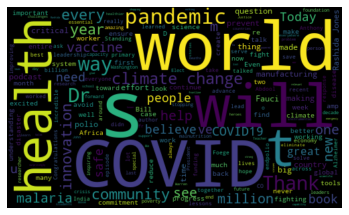

In [62]:
# Visualization using WordCloud
#More appear the word, bigger the word in the plot
allWords = ' '.join([tweet for tweet in df['Tweets']])
wordCloud = WordCloud( width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation= "bilinear")
plt.axis('off')
plt.show()


In [63]:
# Create the function compute the negative, neutral and positive analysi
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    

In [64]:
# Create new column , score
df['Analysis']= df['Polarity'].apply(getAnalysis)
# show df
df.tail(10)

,Tweets,Subjectivity,Polarity,Analysis
90,Bill Foege was instrumental in the effort to e...,0.3000,0.0000,Neutral
91,The world did not do enough to prepare for a p...,0.3125,0.0000,Neutral
92,Great tips from _Bergstrom about how to find r...,0.7500,0.8000,Positive
93,": In our recent webinar, called for community...",0.2500,0.0000,Neutral
94,"If we learn the lessons of COVID-19, we can ap...",0.5000,0.5000,Positive
95,"In his final words, John Lewis challenges all ...",1.0000,0.0000,Neutral
96,The impacts of COVID-19 are driving worrying i...,0.0000,0.0000,Neutral
97,: The ’s support of and is instrumental to t...,0.0000,0.0000,Neutral
98,"In these challenging times, we can’t lose sigh...",0.8750,0.4375,Positive
99,Science and innovation will help us beat COVID...,0.0000,0.0000,Neutral


In [67]:
#Print all the positive tweets

j=1
sortedDF= df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == 'Positive':
        print(str(j)+ ') '+sortedDF['Tweets'][i])
        print()
        j=j+1
        

1) It’s great to see India’s leadership in scientific innovation and vaccine manufacturing capability as the world wor… 

2) : The best emergency system is a strong primary health system—powered by community and frontline health workers. Now is t…

3) What does Rashida Jones have on her shopping list? That’s just one of the many questions that didn’t make it into o… 

4) 2021 will be better than 2020. Here’s why: 

5) Standing up for science has never been more important. Congratulations to Dr. Anthony Fauci and Dr. Salim Abdool Ka… 

6) I've known and learned from  for more than 40 years. I'm glad to see  team up with  to me… 

7) This book has nothing to do with viruses or pandemics. But it is surprisingly relevant for these times.  p… 

8) Monoclonal antibodies are one of the most promising treatments we have for COVID-19, thanks in large part to R&amp;D by… 

9) : We’re looking for new ways to advance AlzheimersResearch. If you have an idea for tools, models, or algorithms that wil

In [68]:
#Print all the negative tweets

j=1
sortedDF= df.sort_values(by=['Polarity'], ascending=False)
for i in range(0,sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == 'Negative':
        print(str(j)+ ') '+sortedDF['Tweets'][i])
        print()
        j=j+1

1) We need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion o… 

2) Nearly forty million people have Alzheimer’s or dementia today. We have no way to stop or even slow the disease at… 

3) : Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

4) : What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

5) To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to… 

6) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise m… 



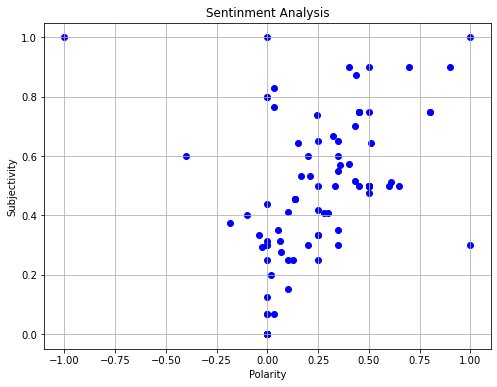

In [76]:
# Plot the polarity and the subjectivity

plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i],color='Blue')
    
plt.grid(True)
plt.title('Sentinment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()



In [78]:
# Get the percentage of the positive tweets

pos_tweets= df[df['Analysis'] == 'Positive']
pos_tweets= pos_tweets['Tweets']

round((len(pos_tweets)/len(df))*100,1)

66.0

In [79]:
# Get the percentage of the negative tweets

neg_tweets= df[df['Analysis'] == 'Negative']
neg_tweets= neg_tweets['Tweets']

round((len(neg_tweets)/len(df))*100,1)

6.0

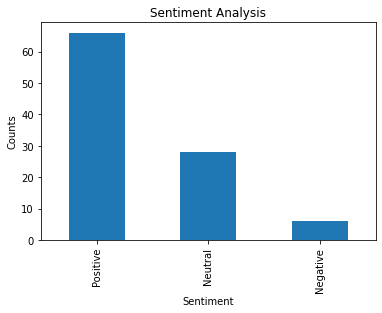

In [83]:
# show the value counts

df['Analysis'].value_counts()

# plot and visualize the counts
df['Analysis'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()